In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from ipywidgets import widgets, interact
%matplotlib inline

In [2]:
#Model Class
class Model(nn.Module):
    def __init__(self, input=4, H1=8, H2=6, output=3):
        super().__init__()
        self.fc1 = nn.Linear(input, H1)
        self.fc2 = nn.Linear(H1, H2)
        self.out = nn.Linear(H2, output)
    
    def forward(self, X_input):
        X_input = F.relu(self.fc1(X_input))
        X_input = F.relu(self.fc2(X_input))
        X_input = self.out(X_input)
        
        return X_input



In [3]:
iris_dataset = 'data/iris.csv'
iris_df = pd.read_csv(iris_dataset)

#replace variety with integers !strings
iris_df['variety'] = iris_df['variety'].replace('Iris-setosa', 0)
iris_df['variety'] = iris_df['variety'].replace('Iris-versicolor', 1)
iris_df['variety'] = iris_df['variety'].replace('Iris-virginica', 2)
# iris_df

In [4]:
# drop true output on input X
input = iris_df.drop('variety', axis=1)
output = iris_df['variety']

#convert to np arrays
input = input.values
output = output.values

#Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(input, output, test_size=0.2, random_state=69)

# convert features to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

Epoch: 0 	 Loss: 1.1341111660003662
Epoch: 10 	 Loss: 0.9911374449729919
Epoch: 20 	 Loss: 0.760148286819458
Epoch: 30 	 Loss: 0.4896123707294464
Epoch: 40 	 Loss: 0.33501094579696655
Epoch: 50 	 Loss: 0.23244613409042358
Epoch: 60 	 Loss: 0.16062428057193756
Epoch: 70 	 Loss: 0.11885369569063187
Epoch: 80 	 Loss: 0.09737487137317657
Epoch: 90 	 Loss: 0.08558419346809387
Epoch: 100 	 Loss: 0.07826774567365646
Epoch: 110 	 Loss: 0.07325203716754913
Epoch: 120 	 Loss: 0.06959864497184753
Epoch: 130 	 Loss: 0.06681837141513824
Epoch: 140 	 Loss: 0.06463723629713058
Epoch: 150 	 Loss: 0.06287868320941925
Epoch: 160 	 Loss: 0.061422981321811676
Epoch: 170 	 Loss: 0.06019020453095436
Epoch: 180 	 Loss: 0.05912657827138901
Epoch: 190 	 Loss: 0.058194663375616074


Text(0, 0.5, 'Loss/error')

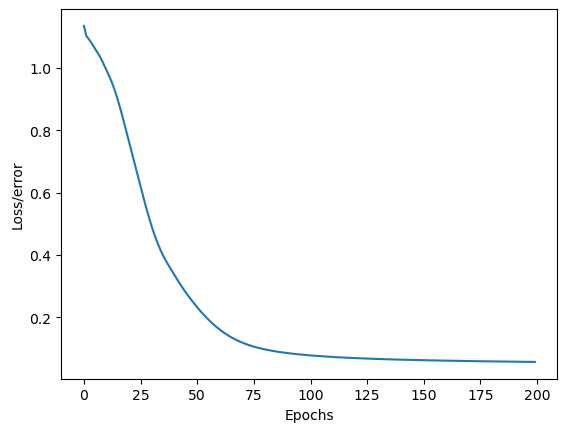

In [5]:
torch.manual_seed(69)
model = Model()
#cross entropy loss for getting error/ accuracy
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 200
losses = []

#foward prop
for i in range(epochs):
    Y_pred = model.forward(X_train)
    loss = criterion(Y_pred, Y_train)   #calculate loss
    losses.append(loss.detach().numpy())  
    
    #print loss
    if i % 10 == 0:
        print(f'Epoch: {i} \t Loss: {loss}')
    
    #back prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss/error')

In [6]:
#check model accuracy
def iris_classifier_multival(X_test):
    correct_guess = 0
    with torch.no_grad():
        for i, data in enumerate(X_test):
            Y_eval = model.forward(data)
            
            if Y_test[i] == 0:
                x = 'setosa'
            elif Y_test[i] == 1:
                x = 'versicolor'
            else:
                x = 'virginica'
            
            if Y_eval.argmax().item() == 0:
                y = 'setosa'
            elif Y_eval.argmax().item() == 1:
                y = 'versicolor'
            else:
                y = 'virginica'
            
            if Y_test[i] == Y_eval.argmax().item():
                z = '✅'
                correct_guess += 1
            else: z = '❌'
            print(f'{i+1} \t {x} \t {y} \t {z}')            

    print(f'model got {correct_guess}/{len(X_test)} correct')
    
iris_classifier_multival(X_test)


1 	 setosa 	 setosa 	 ✅
2 	 versicolor 	 versicolor 	 ✅
3 	 setosa 	 setosa 	 ✅
4 	 virginica 	 virginica 	 ✅
5 	 setosa 	 setosa 	 ✅
6 	 setosa 	 setosa 	 ✅
7 	 versicolor 	 versicolor 	 ✅
8 	 virginica 	 virginica 	 ✅
9 	 virginica 	 virginica 	 ✅
10 	 setosa 	 setosa 	 ✅
11 	 virginica 	 virginica 	 ✅
12 	 virginica 	 virginica 	 ✅
13 	 setosa 	 setosa 	 ✅
14 	 versicolor 	 versicolor 	 ✅
15 	 virginica 	 virginica 	 ✅
16 	 versicolor 	 versicolor 	 ✅
17 	 versicolor 	 versicolor 	 ✅
18 	 virginica 	 virginica 	 ✅
19 	 versicolor 	 versicolor 	 ✅
20 	 virginica 	 virginica 	 ✅
21 	 virginica 	 virginica 	 ✅
22 	 versicolor 	 versicolor 	 ✅
23 	 setosa 	 setosa 	 ✅
24 	 setosa 	 setosa 	 ✅
25 	 virginica 	 virginica 	 ✅
26 	 setosa 	 setosa 	 ✅
27 	 virginica 	 virginica 	 ✅
28 	 virginica 	 virginica 	 ✅
29 	 versicolor 	 versicolor 	 ✅
30 	 setosa 	 setosa 	 ✅
model got 30/30 correct


In [13]:
# save model
torch.save(model.state_dict(), 'iris_classifier_model.pt')

# load model
new_iris_model = Model()
new_iris_model.load_state_dict(torch.load('iris_classifier_model.pt'))
new_iris_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=6, bias=True)
  (out): Linear(in_features=6, out_features=3, bias=True)
)

In [7]:
def update_sliders(sl_val, sw_val, pl_val, pw_val):
    print(f'sepal_length:{sl_val}, sepal_width:{sw_val}, petal_length:{pl_val}, petal_width:{pw_val}')
sepal_length = widgets.FloatSlider(value=5,
                    min=4,
                    max=8,
                    step=0.1,
                    description='sepal.length',
                    orientation='horizontal')

sepal_width = widgets.FloatSlider(value=5,
                    min=2,
                    max=5,
                    step=0.1,
                    description='sepal.width',
                    orientation='horizontal')

petal_length = widgets.FloatSlider(value=5,
                    min=1,
                    max=7,
                    step=0.1,
                    description='petal.length',
                    orientation='horizontal')

petal_width = widgets.FloatSlider(value=5,
                    min=0.1,
                    max=3,
                    step=0.1,
                    description='petal.width',
                    orientation='horizontal')

interact(update_sliders, sl_val=sepal_length, sw_val=sepal_width, pl_val=petal_length, pw_val=petal_width)

interactive(children=(FloatSlider(value=5.0, description='sepal.length', max=8.0, min=4.0), FloatSlider(value=…

<function __main__.update_sliders(sl_val, sw_val, pl_val, pw_val)>

In [17]:
# Loading new data for pridiction
def iris_classifier(data):
    with torch.no_grad():
        predict = new_iris_model(data)
        if predict.argmax().item() == 0:
            y = 'setosa'
        elif predict.argmax().item() == 1:
            y = 'versicolor'
        else:
            y = 'virginica'
        print(f'your Iris is a {y} type.')
new_iris = torch.tensor([sepal_length.value, sepal_width.value, petal_length.value, petal_width.value])
iris_classifier(new_iris)

your Iris is a setosa type.
